In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib




# Ephaptic Coupling #

In [2]:
import numpy as np
import sys
if sys.version < '3':
    from urllib2 import urlopen
else:    
    from urllib.request import urlopen
import ssl
from warnings import warn
import zipfile
import os
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import LFPy
import neuron
from neuron import h

## Fetch model files
### Cell type and cell parameters ###

In [3]:
# define cell parameters used as input to cell-class
cellParameters = {
    'morphology'    : 'L5.hoc',
    'passive' : False,
    'nsegs_method' : None,
    'dt' : 2**-6,
    'tstart' : -159,
    'tstop' : 10,
    'v_init' : -60,
    'celsius': 34,
    'pt3d' : True,
    'extracellular': True,
}

### Creating generator_cell

In [4]:
# delete old sections from NEURON namespace
LFPy.cell.neuron.h("forall delete_section()")

# initialize cell instance, using the LFPy.Cell class
generator_cell = LFPy.Cell(**cellParameters)
generator_cell.set_rotation(x=4.729, y=-3.166)

### Puting Synapse ###

In [5]:
synapse = LFPy.Synapse(generator_cell, 
                       idx = generator_cell.get_idx("soma[0]"),
                       syntype = 'Exp2Syn', 
                       weight = 0.005, 
                       e = 15, 
                       tau1 = 0.5,
                       tau2 = 2,
                       record_current = True)
synapse.set_spike_times(np.array([2.,8]))

### Measuring the external field in the positions of receptor_cell

In [6]:
# place electrodes at each segment of the cell
# define parameters for extracellular recording electrode, using optional method
# x,y,z are coordinates of contacts (from the grid in xz-plane over which we calculate local field potentials)
electrodeParameters = {
    'sigma' : 0.3,                  # extracellular conductivity
    'x' : generator_cell.xmid,      # + distance of the electrodes to the receptor cell
    'y' : generator_cell.ymid,
    'z' : generator_cell.zmid,
    'method' : 'soma_as_point',  #sphere source soma segment
    'N' : np.array([[0, 1, 0]]*generator_cell.xmid.size), #surface normals
    'r' : 2.5,              # contact site radius
    'n' : 20,               # datapoints for averaging
}

# create extracellular electrode object for LFPs on grid
electrode = LFPy.RecExtElectrode(**electrodeParameters)

# perform NEURON simulation of the generator cell
# results saved as attributes in the cell instance
generator_cell.simulate(electrode = electrode,rec_imem=True)

Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-

Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments
Adjusting r-distance to soma segments


### Ploting initial conditions

([<matplotlib.lines.Line2D at 0x11d6d5390>],
 Text(0.5,1,'somatic voltage (mV)'))

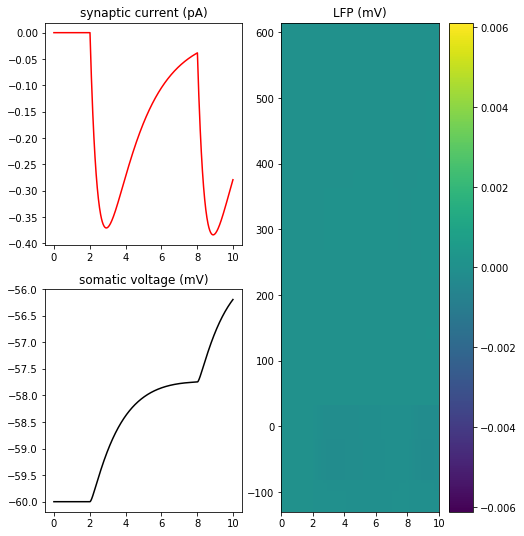

In [7]:
plt.figure(figsize=(12, 9))
plt.subplot(133)
pcolormesh(generator_cell.tvec, electrode.z, electrode.LFP,
           vmin=-abs(electrode.LFP).max(), vmax=abs(electrode.LFP).max())
colorbar()
title('LFP (mV)')

plt.subplot(232)
plt.plot(generator_cell.tvec, synapse.i, 'r'), plt.title('synaptic current (pA)')

plt.subplot(235)
plt.plot(generator_cell.tvec, generator_cell.somav, 'k'), plt.title('somatic voltage (mV)')




#savefig('LFPy-example-1.pdf', dpi=200)

### Creating Receptor_cell

In [9]:
# delete old sections from NEURON namespace
LFPy.cell.neuron.h("forall delete_section()")

# initialize cell instance, using the LFPy.Cell class
receptor_cell = LFPy.Cell(**cellParameters)
receptor_cell.set_rotation(x=4.729, y=-3.166)
receptor_cell.xmid += 100

# time of extracellular field simulation
t = np.arange(electrode.LFP.shape[1]) * receptor_cell.dt

# insert external field generated by the generator cell recorded in electrodes
receptor_cell.insert_v_ext(electrode.LFP, t)

# perform NEURON simulation of the receptor cell
receptor_cell.simulate(rec_vmem=True)

Overwriting custom temperature of 34.00. New temperature is 34.00


In [ ]:
#plt.plot(receptor_cell.vmem)
#print(receptor_cell.vmem)

#plt.plot(t,receptor_cell.vmem[140])
#plt.xlabel("Time")
#print(max(receptor_cell.vmem[140]))

In [ ]:
# find index positions of electrodes in the cells
positions = np.array(list(zip(receptor_cell.xmid, receptor_cell.zmid)))

target = np.array([200,600])      # estimated location in the plot
target_index = ((positions - target)**2).sum(axis=1).argmin()     # find closest electrode

target_pos = positions[target_index]       # find target electrode index

In [ ]:
plt.figure(dpi=100,
          figsize=(4,6))

plt.scatter(generator_cell.xmid, generator_cell.zmid,s=2)
plt.scatter(receptor_cell.xmid, receptor_cell.zmid,s=2)

plt.scatter(target_pos[0],target_pos[1],s=10,color='k')

In [ ]:
pcolormesh(generator_cell.tvec, electrode.z, electrode.LFP,
           vmin=-abs(electrode.LFP).max(), vmax=abs(electrode.LFP).max())
colorbar()
title('LFP (mV)')

In [ ]:
# plot generator cell

def plotstuff(receptor_cell, electrode):
    fig = plt.figure(dpi=160)
    
    ax1 = fig.add_axes([0.05, 0.1, 0.55, 0.9], frameon=False)
    cax = fig.add_axes([0.05, 0.115, 0.55, 0.015])
    
    #plot each electrode as a point
    #ax1.plot(electrode.x, electrode.z, '.', marker='o', markersize=1, color='k',zorder=0)  
   
    
    #normalize to min peak
    Vmem_min = receptor_cell.vmem.min(axis=1)
    Vmem_norm = -(receptor_cell.vmem.T / Vmem_min).T  #T is the transpose
    print(len(Vmem_min))
    print(len(receptor_cell.vmem))
    
    i = 0
    zips = []
    for x in Vmem_norm:
        zips.append(list(zip(receptor_cell.tvec*1.6 + electrode.x[i] + 2,
                        x*12 + electrode.z[i])))
        i += 1
    
    line_segments = LineCollection(zips,
                                    linewidths = (1.5),
                                    linestyles = 'solid',
                                    cmap='nipy_spectral',
                                    zorder=1,
                                    rasterized=True)
    
    line_segments.set_array(np.log10(-Vmem_min))
    ax1.add_collection(line_segments)
    
    axcb = fig.colorbar(line_segments, cax=cax, orientation='horizontal')
    axcb.outline.set_visible(True)
    xticklabels = np.array([-0.1  , -0.05 , -0.02 , -0.01 , -0.005, -0.002])
    xticks = np.log10(-xticklabels)
    axcb.set_ticks(xticklabels)
    axcb.set_ticklabels(np.round(-10**xticks, decimals=3))  
    axcb.set_label('membrane potential amplitude (mV)', va='center')
    
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    axis = ax1.axis(ax1.axis('equal'))
    ax1.set_xlim(axis[0]*1.02, axis[1]*1.02)
    
    return fig

fig = plotstuff(receptor_cell, electrode)
print(receptor_cell.vmem.min)

In [ ]:
print(receptor_cell.vmem)

In [ ]:
print(receptor_cell.vmem.min(axis=1))